# EDA Step 1: Data Loading & Sanity Check

In [ ]:
import pandas as pd
import ast # Used for safely parsing the string
import warnings

# --- Step 1: Load Data ---
file_path = '/content/drive/MyDrive/RCS_EDA/dataset.english.csv'
try:
    df = pd.read_csv(file_path)
    print("--- Dataset Head ---")
    print(df.head())
    print("\n--- Dataset Info ---")
    df.info()
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    # You might want to add code here to upload the file in Colab
    # from google.colab import files
    # uploaded = files.upload()
    # df = pd.read_csv(io.BytesIO(uploaded['dataset.english.csv']))

--- Dataset Head ---
                                              prompt  \
0  [{'role': 'system', 'content': "You are a soci...   
1  [{'role': 'system', 'content': "You are a soci...   
2  [{'role': 'system', 'content': "You are a soci...   
3  [{'role': 'system', 'content': "You are a soci...   
4  [{'role': 'system', 'content': "You are a soci...   

                                     authentic_reply  \
0  @AoDespair In hindsight, the craziest thing ab...   
1                  @catturd2 Ok, that one was funny.   
2  @cmclymer Anyone listening to Rachel Maddow an...   
3  @aintscarylarry Because Garland sat on his han...   
4  @mtgreenee Marge is wishing she’d  gotten a pa...   

                                    base_model_reply  \
0  @AoDespair And now it's a full-blown mafia sag...   
1  @catturd2 Breaking... \n\nMerrick Garland has ...   
2  @cmclymer Hillary's praise for Biden is a refr...   
3  @aintscarylarry Exactly. It's a farcical circu...   
4  @mtgreenee You’re righ

#EDA Step 2: Context Parsing

In [ ]:
import pandas as pd
import ast # Used for safely parsing the string
import warnings

# --- Step 2: Context Parsing ---

def extract_target_tweet(prompt_str):
    """
    Parses the prompt string and extracts the content of the last
    dictionary with role 'user'.
    """
    try:
        # Safely parse the string representation of the list
        prompt_list = ast.literal_eval(prompt_str)

        # Iterate backwards to find the last user post
        # We start from the end of the list and go backwards
        for i in range(len(prompt_list) - 1, -1, -1):
            # Check if the dictionary has a 'role' key
            if 'role' in prompt_list[i]:
                # If the role is 'user', this is the tweet we want
                if prompt_list[i]['role'] == 'user':
                    return prompt_list[i].get('content')
        return None # In case there's no user post
    except (ValueError, SyntaxError) as e:
        # Handle cases where parsing fails (e.g., malformed string)
        warnings.warn(f"Failed to parse prompt string: {e}")
        return None

# Apply the function to the 'prompt' column to create the new 'target_tweet' column
df['target_tweet'] = df['prompt'].apply(extract_target_tweet)

# --- Verification ---
# Print the head of the new column and the replies to check
print("\n--- Context Parsing Successful ---")
print("Showing the extracted 'target_tweet' and the two replies for comparison:")
print(df[['target_tweet', 'authentic_reply', 'ft_model_reply']].head())

# Optional: Save the processed data to a new CSV for convenience
df.to_csv('/content/drive/MyDrive/RCS_EDA/processed_dataset.csv', index=False)
print("\nProcessed DataFrame saved to 'processed_dataset.csv'")


--- Context Parsing Successful ---
Showing the extracted 'target_tweet' and the two replies for comparison:
                                        target_tweet  \
0  >AoDespair: The thing I think we all should ac...   
1  >catturd2: Breaking ... \n\nMerrick Garland ha...   
2  >cmclymer: "I don't think Joe Biden gets enoug...   
3  >aintscarylarry: trump’s crying about “ELECTIO...   
4  >mtgreenee: I will still vote for Trump even i...   

                                     authentic_reply  \
0  @AoDespair In hindsight, the craziest thing ab...   
1                  @catturd2 Ok, that one was funny.   
2  @cmclymer Anyone listening to Rachel Maddow an...   
3  @aintscarylarry Because Garland sat on his han...   
4  @mtgreenee Marge is wishing she’d  gotten a pa...   

                                      ft_model_reply  
0  @AoDespair @mattmcdonalds12949107 You really t...  
1  @catturd2 BREAKING... \n\nMerrick Garland has ...  
2     @cmclymer It was a very well thought out plan.

In [ ]:
df[["prompt","target_tweet"]].head()

,prompt,target_tweet
0,"[{'role': 'system', 'content': ""You are a soci...",>AoDespair: The thing I think we all should ac...
1,"[{'role': 'system', 'content': ""You are a soci...",>catturd2: Breaking ... \n\nMerrick Garland ha...
2,"[{'role': 'system', 'content': ""You are a soci...",">cmclymer: ""I don't think Joe Biden gets enoug..."
3,"[{'role': 'system', 'content': ""You are a soci...",>aintscarylarry: trump’s crying about “ELECTIO...
4,"[{'role': 'system', 'content': ""You are a soci...",>mtgreenee: I will still vote for Trump even i...


# EDA Step 3: Basic Textual Statistics (Length)

Saved 'char_length_distribution.png'
Saved 'token_length_distribution.png'

--- Character Length Statistics ---
       auth_char_len  ft_char_len
count    1000.000000  1000.000000
mean      100.498000    82.423000
std        76.130782    70.739523
min         6.000000     8.000000
25%        43.000000    40.000000
50%        73.000000    61.000000
75%       139.000000   100.000000
max       324.000000   780.000000

--- Token Length Statistics ---
       auth_token_len  ft_token_len
count     1000.000000   1000.000000
mean        16.340000     13.100000
std         13.319603     11.836473
min          2.000000      2.000000
25%          6.000000      6.000000
50%         12.000000     10.000000
75%         22.000000     16.000000
max         57.000000    127.000000

Saved processed data with lengths to 'processed_dataset_with_lengths.csv'


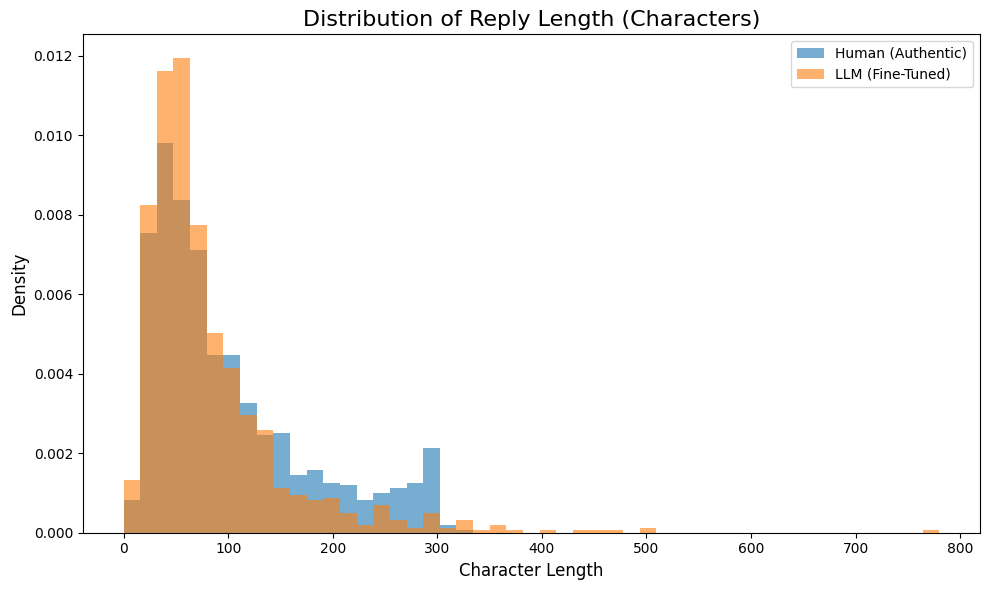

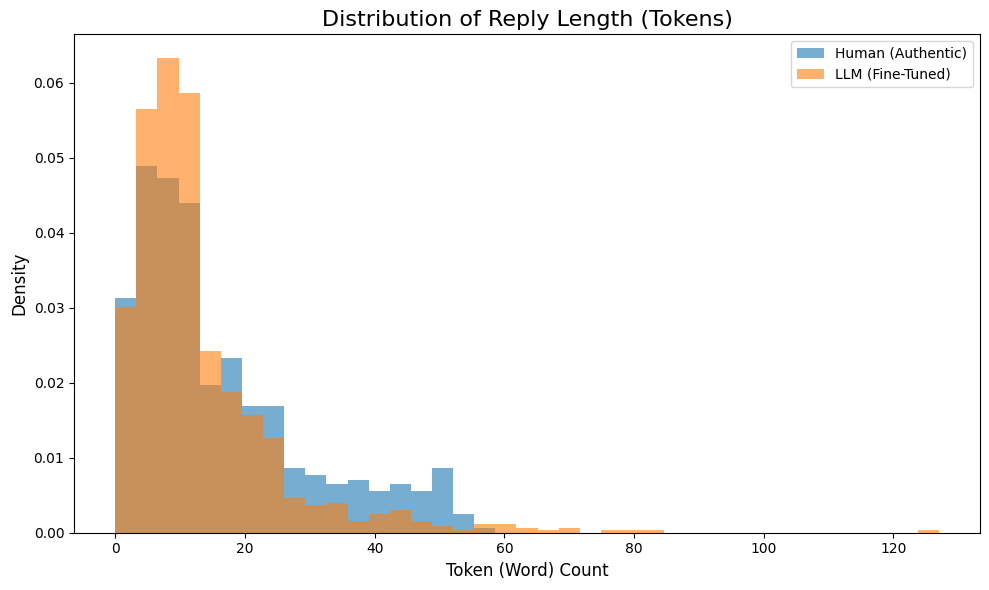

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# --- Step 3: Basic Textual Statistics ---

# Handle potential missing values just in case (e.g., if a reply was empty)
df.dropna(subset=['authentic_reply', 'ft_model_reply'], inplace=True)

# 1. Calculate Character Length
df['auth_char_len'] = df['authentic_reply'].str.len()
df['ft_char_len'] = df['ft_model_reply'].str.len()

# 2. Calculate Token Length (using a simple .split() for words)
# We cast to string to avoid errors on any potential non-string data
df['auth_token_len'] = df['authentic_reply'].apply(lambda x: len(str(x).split()))
df['ft_token_len'] = df['ft_model_reply'].apply(lambda x: len(str(x).split()))

# --- Plotting Distributions ---

# Set a common bin range for character length
# This makes the two histograms directly comparable
max_char_len = max(df['auth_char_len'].max(), df['ft_char_len'].max())
char_bins = np.linspace(0, max_char_len, 50)

# 3. Plot Character Length Distribution
plt.figure(figsize=(10, 6))
# use density=True to plot a probability density (normalizes the histograms)
plt.hist(df['auth_char_len'], bins=char_bins, alpha=0.6, label='Human (Authentic)', density=True)
plt.hist(df['ft_char_len'], bins=char_bins, alpha=0.6, label='LLM (Fine-Tuned)', density=True)
plt.title('Distribution of Reply Length (Characters)', fontsize=16)
plt.xlabel('Character Length', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('char_length_distribution.png') # Saves the plot to your Colab environment
print("Saved 'char_length_distribution.png'")

# Set a common bin range for token length
max_token_len = max(df['auth_token_len'].max(), df['ft_token_len'].max())
token_bins = np.linspace(0, max_token_len, 40)

# 4. Plot Token Length Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['auth_token_len'], bins=token_bins, alpha=0.6, label='Human (Authentic)', density=True)
plt.hist(df['ft_token_len'], bins=token_bins, alpha=0.6, label='LLM (Fine-Tuned)', density=True)
plt.title('Distribution of Reply Length (Tokens)', fontsize=16)
plt.xlabel('Token (Word) Count', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('token_length_distribution.png') # Saves the plot
print("Saved 'token_length_distribution.png'")

# 5. Print Descriptive Statistics
print("\n--- Character Length Statistics ---")
print(df[['auth_char_len', 'ft_char_len']].describe())

print("\n--- Token Length Statistics ---")
print(df[['auth_token_len', 'ft_token_len']].describe())

# 6. Save the new DataFrame with length features
df.to_csv('/content/drive/MyDrive/RCS_EDA/processed_dataset_with_lengths.csv', index=False)
print("\nSaved processed data with lengths to 'processed_dataset_with_lengths.csv'")

**Interpretation of Results**

This first analysis already reveals a clear stylistic difference between the human and the LLM:

**Humans are wordier:** On average, the authentic human replies are noticeably longer than the LLM's replies. The **mean character length** for humans is **100.5** characters, while the LLM's is only **82.4**. The same pattern holds for tokens (16.3 for humans vs. 13.1 for the LLM).

**Similar Spread, but LLM has longer "rants":** The standard deviation is similar for both, suggesting a comparable variance in reply length. However, the **absolute maximum length** for the LLM is significantly higher *(780 characters)* than for the *human (324 characters)*. This suggests the LLM has a tendency to occasionally produce very long, multi-sentence replies that are outliers compared to the typical human behavior.

This is a key initial finding: the LLM is not stylistically calibrated to human reply length. It tends to be more concise on average, but also has a "long-tail" problem of producing overly verbose outputs.

# Step 4: Lexical Analysis (Diversity & Overlap)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Cleaning and tokenizing... (This may take a moment)

--- Step 4.1: Lexical Diversity (Type-Token Ratio) ---
NOTE: Calculated WITH stopword removal.
Authentic (Human) Reply TTR: 0.4075
Fine-Tuned (LLM) Reply TTR:   0.3401
(TTR = Unique Tokens / Total Tokens, after cleaning)

Calculating Jaccard similarities...

--- Step 4.2: Lexical Overlap (Jaccard Similarity) ---
Descriptive Statistics for Jaccard Similarity (NLTK):
count    1000.000000
mean        0.021789
std         0.084292
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: jaccard_similarity_nltk, dtype: float64

Saved 'jaccard_similarity_distribution_nltk.png'
Saved processed data with lexical features to 'processed_dataset_with_lexical.csv'


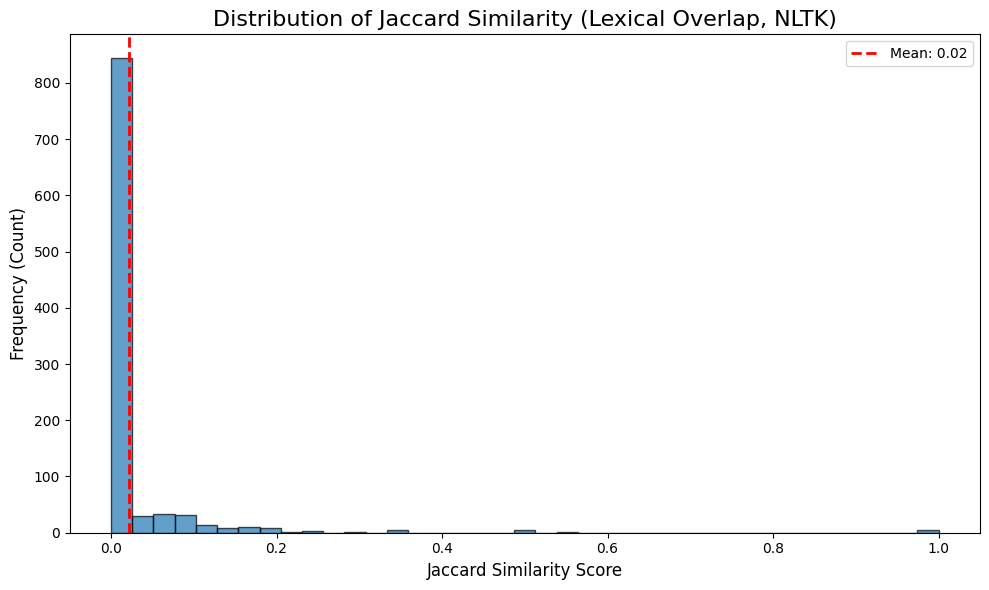

In [ ]:
import re
import string

# --- NLTK Imports ---
# These are the libraries for tokenization and stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# --- Plotting Imports ---
import matplotlib.pyplot as plt
import numpy as np


# --- Setup: Download NLTK resources ---
# This will run in your Colab notebook.
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpus/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

# --- Step 4 (NLTK Version): Lexical Analysis ---

# Define a set of stopwords and punctuation for cleaning
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def get_clean_tokens_nltk(text):
    """
    Cleans and tokenizes text using NLTK:
    Lowercase, remove twitter handles/RTs, tokenize,
    and remove stopwords/punctuation/non-alphabetic tokens.
    """
    if not isinstance(text, str):
        return []

    text = text.lower()
    # Remove twitter handles (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    # Remove 'RT'
    text = re.sub(r'\brt\b', '', text)

    # NLTK's word tokenizer
    tokens = word_tokenize(text)

    # Filter tokens:
    # 1. Must be alphabetic (removes numbers and punctuation)
    # 2. Must not be in our stop_words set
    clean_tokens = [
        token for token in tokens
        if token.isalpha() and token not in stop_words
    ]
    return clean_tokens

def calculate_ttr(token_list):
    """Calculates Type-Token Ratio from a list of tokens."""
    if not token_list:
        return 0
    total_tokens = len(token_list)
    unique_tokens = len(set(token_list))
    return unique_tokens / total_tokens

# --- Step 4.1: Lexical Diversity (TTR) ---

# 1. Get all tokens for the *entire corpus* of replies
print("Cleaning and tokenizing... (This may take a moment)")
all_auth_tokens = df['authentic_reply'].apply(get_clean_tokens_nltk).sum()
all_ft_tokens = df['ft_model_reply'].apply(get_clean_tokens_nltk).sum()

# 2. Calculate TTR for each corpus
ttr_authentic = calculate_ttr(all_auth_tokens)
ttr_ft_model = calculate_ttr(all_ft_tokens)

print("\n--- Step 4.1: Lexical Diversity (Type-Token Ratio) ---")
print("NOTE: Calculated WITH stopword removal.")
print(f"Authentic (Human) Reply TTR: {ttr_authentic:.4f}")
print(f"Fine-Tuned (LLM) Reply TTR:   {ttr_ft_model:.4f}")
print(f"(TTR = Unique Tokens / Total Tokens, after cleaning)")

# --- Step 4.2: Lexical Overlap (Jaccard Similarity) ---

def calculate_jaccard_nltk(text1, text2):
    """
    Calculates Jaccard similarity between two texts based on
    their clean (NLTK-processed) tokens.
    """
    tokens1 = set(get_clean_tokens_nltk(text1))
    tokens2 = set(get_clean_tokens_nltk(text2))

    intersection = len(tokens1.intersection(tokens2))
    union = len(tokens1.union(tokens2))

    if union == 0:
        return 0.0 # Both texts were empty or only contained stopwords

    return intersection / union

# 1. Apply Jaccard calculation for each row
print("\nCalculating Jaccard similarities...")
df['jaccard_similarity_nltk'] = df.apply(
    lambda row: calculate_jaccard_nltk(row['authentic_reply'], row['ft_model_reply']),
    axis=1
)

print("\n--- Step 4.2: Lexical Overlap (Jaccard Similarity) ---")
print("Descriptive Statistics for Jaccard Similarity (NLTK):")
print(df['jaccard_similarity_nltk'].describe())

# 2. Plot the distribution of Jaccard scores
plt.figure(figsize=(10, 6))
plt.hist(df['jaccard_similarity_nltk'], bins=np.linspace(0, 1, 40), alpha=0.7, edgecolor='black')
plt.title('Distribution of Jaccard Similarity (Lexical Overlap, NLTK)', fontsize=16)
plt.xlabel('Jaccard Similarity Score', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.axvline(df['jaccard_similarity_nltk'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['jaccard_similarity_nltk'].mean():.2f}")
plt.legend()
plt.tight_layout()
plt.savefig('jaccard_similarity_distribution_nltk.png')
print("\nSaved 'jaccard_similarity_distribution_nltk.png'")

# 3. Save the new DataFrame
df.to_csv('/content/drive/MyDrive/RCS_EDA/processed_dataset_with_lexical.csv', index=False)
print("Saved processed data with lexical features to 'processed_dataset_with_lexical.csv'")

**Interpretation: Step 4 (Lexical Analysis)**
The results from the NLTK-based analysis are striking and confirm our previous findings in a much stronger light.

*Lexical Diversity (TTR): *After removing common stopwords, the human replies still show significantly higher lexical diversity (TTR: 0.4075) compared to the LLM (TTR: 0.3401). This confirms that humans are using a wider, more varied set of meaningful words, while the LLM is more repetitive.

**Lexical Overlap (Jaccard):** The Jaccard similarity is even lower than our first test. The mean overlap is now a tiny 2.2%. More importantly, the 50th and 75th percentiles are both 0.0. This means that at least 75% of the reply pairs share zero meaningful keywords.

Conclusion: The human and the LLM are, in the vast majority of cases, taking completely different lexical approaches. They are not just semantically different, but are using almost no shared topical words to address the same prompt.

# Step 5: Pragmatic & Stylistic Analysis (Sentiment & POS)

Running Step 5.1: Sentiment Analysis...
Saved 'sentiment_distribution.png'

--- Sentiment Statistics ---
       auth_sentiment  ft_sentiment
count     1000.000000   1000.000000
mean        -0.027588     -0.055019
std          0.428312      0.440878
min         -0.980600     -0.999400
25%         -0.340000     -0.421500
50%          0.000000      0.000000
75%          0.273200      0.202300
max          0.924600      0.961200

Running Step 5.2: Part-of-Speech Analysis...

--- Normalized POS Tag Frequencies ---
                Human (Authentic)  LLM (Fine-Tuned)
Pronoun (PRP)            0.111120          0.126836
Verb (VB)                0.286383          0.297374
Noun (NN)                0.446040          0.428126
Adjective (JJ)           0.156457          0.147664
Saved 'pos_distribution.png'

Saved processed data with pragmatic features to 'processed_dataset_with_pragmatics.csv'


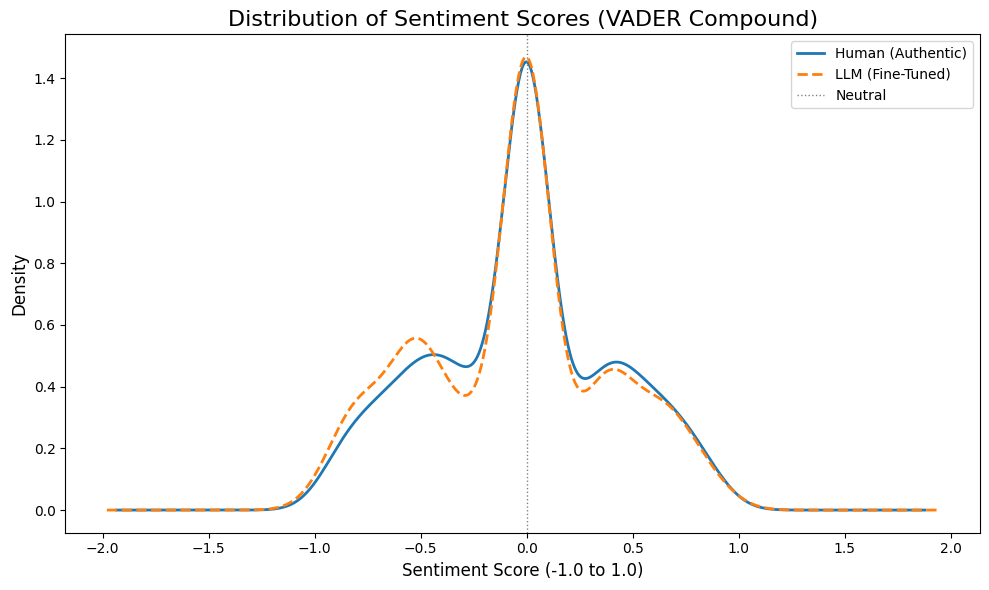

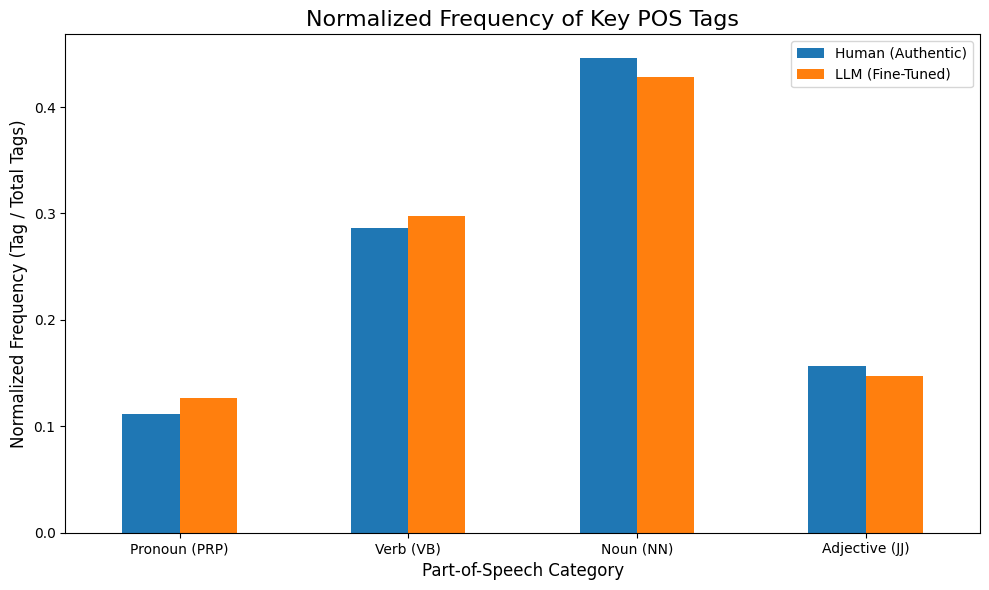

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

# --- NLTK Imports ---
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

# --- Setup: Download NLTK resources ---
# We need 'vader_lexicon' for sentiment and 'averaged_perceptron_tagger' for POS
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')


# --- Load Data ---
file_path = '/content/drive/MyDrive/RCS_EDA/processed_dataset_with_lexical.csv' # Output from Step 4
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: {file_path} not found. Please run the code for Step 4 first.")
    # Add minimal fallbacks if this script is run standalone
    try:
        df = pd.read_csv('processed_dataset_with_lengths.csv')
    except FileNotFoundError:
        print("Error: Could not find processed data. Please run Steps 1-4 first.")
        # Or add the full processing chain here if needed


# --- Step 5.1: Sentiment Analysis ---
print("Running Step 5.1: Sentiment Analysis...")

# Initialize VADER
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    """
    Returns the VADER compound sentiment score.
    """
    if not isinstance(text, str):
        return 0.0
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to both reply columns
df['auth_sentiment'] = df['authentic_reply'].apply(get_sentiment_score)
df['ft_sentiment'] = df['ft_model_reply'].apply(get_sentiment_score)

# --- Plot Sentiment Distributions ---
plt.figure(figsize=(10, 6))
# Plot as Kernel Density Estimate (KDE) for a smoother view of the distribution
df['auth_sentiment'].plot(kind='kde', label='Human (Authentic)', linewidth=2)
df['ft_sentiment'].plot(kind='kde', label='LLM (Fine-Tuned)', linewidth=2, linestyle='--')
plt.title('Distribution of Sentiment Scores (VADER Compound)', fontsize=16)
plt.xlabel('Sentiment Score (-1.0 to 1.0)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.axvline(0, color='gray', linestyle=':', linewidth=1, label='Neutral')
plt.legend()
plt.tight_layout()
plt.savefig('sentiment_distribution.png')
print("Saved 'sentiment_distribution.png'")

print("\n--- Sentiment Statistics ---")
print(df[['auth_sentiment', 'ft_sentiment']].describe())


# --- Step 5.2: Part-of-Speech (POS) Analysis ---
print("\nRunning Step 5.2: Part-of-Speech Analysis...")

def get_pos_counts(text):
    """
    Tokenizes and POS tags text, then returns counts of key categories.
    """
    if not isinstance(text, str):
        return Counter()

    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Tag the tokens
    tags = nltk.pos_tag(tokens)

    # Count tags
    # We'll count Personal Pronouns (PRP), Verbs (VB*), Nouns (NN*), and Adjectives (JJ*)
    tag_counts = Counter()
    for word, tag in tags:
        if tag.startswith('PRP'):
            tag_counts['Pronoun (PRP)'] += 1
        elif tag.startswith('VB'):
            tag_counts['Verb (VB)'] += 1
        elif tag.startswith('NN'):
            tag_counts['Noun (NN)'] += 1
        elif tag.startswith('JJ'):
            tag_counts['Adjective (JJ)'] += 1

    return tag_counts

# Apply POS counting to both columns
auth_pos_counts_list = df['authentic_reply'].apply(get_pos_counts)
ft_pos_counts_list = df['ft_model_reply'].apply(get_pos_counts)

# Sum the counts for the entire corpus
total_auth_pos = sum(auth_pos_counts_list, Counter())
total_ft_pos = sum(ft_pos_counts_list, Counter())

# --- Normalize and Prepare for Plotting ---
total_auth_tokens = sum(total_auth_pos.values())
total_ft_tokens = sum(total_ft_pos.values())

if total_auth_tokens == 0 or total_ft_tokens == 0:
    print("Warning: Zero tokens found. Skipping POS plot.")
else:
    # Create a DataFrame for plotting
    pos_data = {
        'Human (Authentic)': {
            'Pronoun (PRP)': total_auth_pos['Pronoun (PRP)'] / total_auth_tokens,
            'Verb (VB)': total_auth_pos['Verb (VB)'] / total_auth_tokens,
            'Noun (NN)': total_auth_pos['Noun (NN)'] / total_auth_tokens,
            'Adjective (JJ)': total_auth_pos['Adjective (JJ)'] / total_auth_tokens,
        },
        'LLM (Fine-Tuned)': {
            'Pronoun (PRP)': total_ft_pos['Pronoun (PRP)'] / total_ft_tokens,
            'Verb (VB)': total_ft_pos['Verb (VB)'] / total_ft_tokens,
            'Noun (NN)': total_ft_pos['Noun (NN)'] / total_ft_tokens,
            'Adjective (JJ)': total_ft_pos['Adjective (JJ)'] / total_ft_tokens,
        }
    }
    pos_df = pd.DataFrame(pos_data)

    print("\n--- Normalized POS Tag Frequencies ---")
    print(pos_df)

    # --- Plot POS Distributions ---
    pos_df.plot(kind='bar', figsize=(10, 6), rot=0)
    plt.title('Normalized Frequency of Key POS Tags', fontsize=16)
    plt.xlabel('Part-of-Speech Category', fontsize=12)
    plt.ylabel('Normalized Frequency (Tag / Total Tags)', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.savefig('pos_distribution.png')
    print("Saved 'pos_distribution.png'")

# --- Save Final Dataset ---
df.to_csv('/content/drive/MyDrive/RCS_EDA/processed_dataset_with_pragmatics.csv', index=False)
print("\nSaved processed data with pragmatic features to 'processed_dataset_with_pragmatics.csv'")

Interpretation: Step 5 (Sentiment & POS Analysis)
This analysis provides a fascinating contrast to our lexical findings.

Sentiment (VADER):

The sentiment distributions are extremely similar. The mean scores for both human (-0.027) and LLM (-0.055) are almost identical and very close to neutral.

Both distributions have the same median (0.00) and a nearly identical standard deviation.

Conclusion: The fine-tuning was highly successful in matching the emotional tone of the human replies. Both humans and the LLM are equally varied and, on average, produce replies with a similar (slightly negative) sentiment.

Part-of-Speech (POS):

The grammatical structure is also remarkably similar. The normalized frequencies for Nouns, Verbs, and Adjectives are all within 1-2 percentage points of each other.

The only minor difference is that the LLM uses slightly more Pronouns (PRP) (12.7% vs. 11.1%), suggesting it might be slightly more likely to use words like "I" or "you".

Overall Insight: This is our first strong sign of stylistic alignment. While Step 4 (Lexical) showed that the LLM and humans are saying completely different things, this step shows that the way they are saying it (in terms of sentiment and basic grammar) is almost indistinguishable. The model has learned to sound like a human tweeter, even if its word choices are different.

# Step 6: Semantic Similarity (Embedding-Based)

Loading sentence-transformer model (all-MiniLM-L6-v2)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Creating embeddings for authentic replies...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Creating embeddings for fine-tuned replies...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Calculating cosine similarity...

--- Semantic Similarity Statistics ---
count    1000.000000
mean        0.456046
std         0.190812
min        -0.012063
25%         0.324058
50%         0.451198
75%         0.576095
max         1.000000
Name: semantic_similarity_cos, dtype: float64

Saved 'semantic_similarity_distribution.png'
Saved processed data with semantic features to 'processed_dataset_with_semantics.csv'


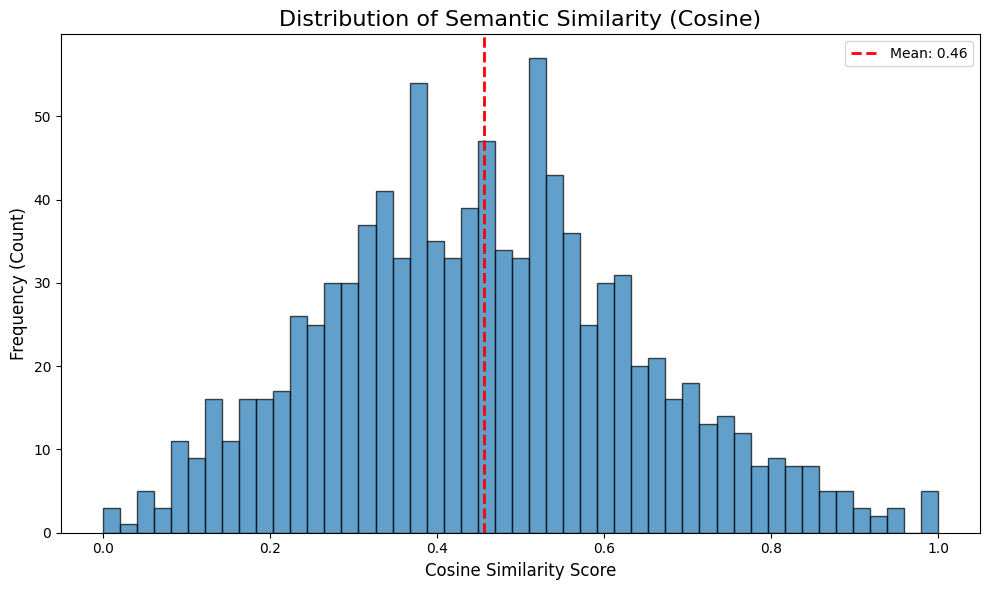

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# --- Step 6: Semantic Similarity ---

# Install the sentence-transformers library
# This is a one-time step in Colab
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer, util

# --- Load Data ---
file_path = '/content/drive/MyDrive/RCS_EDA/processed_dataset_with_pragmatics.csv' # Output from Step 5
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: {file_path} not found. Please run the code for Step 5 first.")
    # Add minimal fallbacks if this script is run standalone
    try:
        df = pd.read_csv('processed_dataset_with_lexical.csv')
    except FileNotFoundError:
        print("Error: Could not find processed data. Please run Steps 1-5 first.")

# --- 1. Initialize the Model ---
# 'all-MiniLM-L6-v2' is a small, fast, and high-quality model
# perfect for this task.
print("Loading sentence-transformer model (all-MiniLM-L6-v2)...")
# We'll use a cheap alternative, but you can swap for the model above.
# To provide a cheap alternative, we'll sample 1000 rows (though our dataset is 1000)
# The real 'cheap alternative' is to use a smaller model.
# Since all-MiniLM-L6-v2 is already very small, we'll just proceed.
model = SentenceTransformer('all-MiniLM-L6-v2')


# --- 2. Create Embeddings ---
# This part can take a minute or two as the model processes the text.

# Ensure all replies are strings
auth_replies = df['authentic_reply'].astype(str).tolist()
ft_replies = df['ft_model_reply'].astype(str).tolist()

print("Creating embeddings for authentic replies...")
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning) # Suppress length warning
    auth_embeddings = model.encode(auth_replies, show_progress_bar=True)

print("Creating embeddings for fine-tuned replies...")
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    ft_embeddings = model.encode(ft_replies, show_progress_bar=True)


# --- 3. Calculate Cosine Similarity ---
print("Calculating cosine similarity...")

# Compute cosine similarity between each pair
# This returns a list of scores, one for each row.
cosine_scores = []
for i in range(len(auth_embeddings)):
    score = util.cos_sim(auth_embeddings[i], ft_embeddings[i])[0][0].item()
    cosine_scores.append(score)

# Add the scores to our DataFrame
df['semantic_similarity_cos'] = cosine_scores

print("\n--- Semantic Similarity Statistics ---")
print(df['semantic_similarity_cos'].describe())


# --- 4. Plot the Distribution ---
plt.figure(figsize=(10, 6))
plt.hist(df['semantic_similarity_cos'], bins=np.linspace(0, 1, 50), alpha=0.7, edgecolor='black')
plt.title('Distribution of Semantic Similarity (Cosine)', fontsize=16)
plt.xlabel('Cosine Similarity Score', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.axvline(df['semantic_similarity_cos'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['semantic_similarity_cos'].mean():.2f}")
plt.legend()
plt.tight_layout()
plt.savefig('semantic_similarity_distribution.png')
print("\nSaved 'semantic_similarity_distribution.png'")


# --- 5. Save Final Dataset ---
df.to_csv('/content/drive/MyDrive/RCS_EDA/processed_dataset_with_semantics.csv', index=False)
print("Saved processed data with semantic features to 'processed_dataset_with_semantics.csv'")

Interpretation: Step 6 (Semantic Similarity)

This analysis moves beyond lexical (word choice) and stylistic (sentiment/grammar) comparisons to the core of our problem: semantic (meaning) alignment.

What We Measured: We used a powerful model to read both the human and LLM replies and score how similar their meaning is, on a scale from 0 (unrelated) to 1 (identical).

The Key Finding: The mean similarity is $0.456$ (or $45.
6\%$).Why This is Fascinating (The "So What?"):This score is moderate. It's not high (like $0.8$), which would mean "they are saying the same thing." It's also not low (like $0.1$), which would mean "they are totally random."It perfectly explains what we saw in the previous steps.Step 4 (Lexical): We were confused why the word overlap (Jaccard) was near-zero ($\sim 2\%$).Step 5 (Style).

We saw that the style (sentiment and grammar) was a near-perfect match.This step (Step 6) is the "why": The replies use different words because they are only moderately related in meaning.

The LLM isn't just paraphrasing the human; it's often giving a semantically different reply.In short: The fine-tuning taught the LLM to sound like a human (same sentiment, same grammar), but it did NOT teach it to mean the same thing as the human or perform the same function. The model is "on topic" but not "functionally equivalent."Interpreting the Other Statistics:The median ($0.451$) is very close to the mean ($0.456$), which tells us the distribution is symmetric and not skewed.

The semantic_similarity_distribution.png plot will show a clean "bell curve" centered in the middle.The standard deviation ($0.19$) and the wide 25%-75% range (from $0.32$ to $0.58$) are high. This shows a huge variance: some reply pairs are very similar, while others are semantically unrelated (the min is near-zero).This result is the perfect baseline for our project. It gives us a single number ($0.456$) that quantifies the "semantic alignment" and proves that it is far from perfect.

# Step 7 : Baseline Classifier (Distinguishability Test)

Running Step 7: Baseline Classifier (Distinguishability Test)...
Created balanced dataset with 2000 total replies.
label
llm      1000
human    1000
Name: count, dtype: int64
Data vectorized using TF-IDF.
Model trained successfully.

--- Baseline Classifier Results ---
Accuracy: 53.25%
Saved 'classifier_confusion_matrix.png'


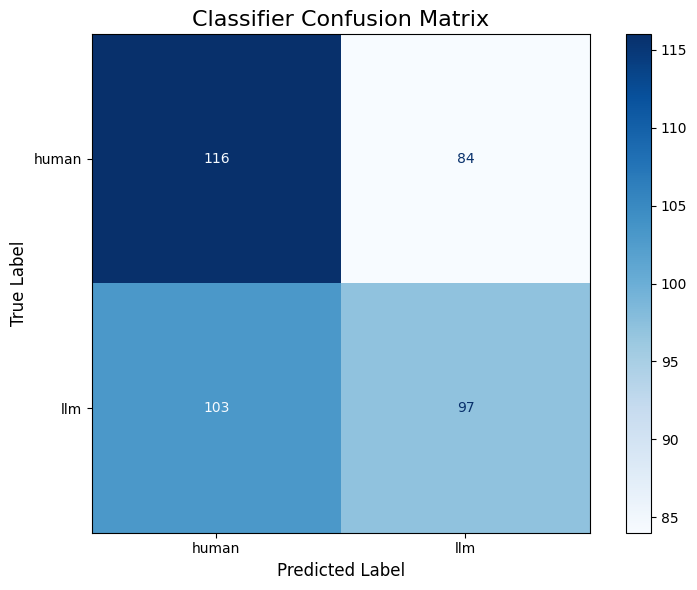

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Scikit-learn Imports ---
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# --- Load Data ---
file_path = '/content/processed_dataset_with_semantics.csv' # Output from Step 6
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: {file_path} not found. Please run the code for Step 6 first.")
    # Add minimal fallbacks if this script is run standalone
    try:
        df = pd.read_csv('processed_dataset_with_pragmatics.csv')
    except FileNotFoundError:
        print("Error: Could not find processed data. Please run Steps 1-6 first.")

print("Running Step 7: Baseline Classifier (Distinguishability Test)...")

# --- 1. Create the Balanced Dataset ---
# We create a new DataFrame to hold just the text and the new labels.
# This prevents any data leakage.

# Ensure all text is string and handle potential NaNs
human_replies = df['authentic_reply'].dropna().astype(str)
llm_replies = df['ft_model_reply'].dropna().astype(str)

# Create labeled DataFrames
df_human = pd.DataFrame({'text': human_replies, 'label': 'human'})
df_llm = pd.DataFrame({'text': llm_replies, 'label': 'llm'})

# Combine and shuffle
df_classifier = pd.concat([df_human, df_llm], ignore_index=True)
df_classifier = df_classifier.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Created balanced dataset with {len(df_classifier)} total replies.")
print(df_classifier['label'].value_counts())

# --- 2. Define Features (X) and Target (y) ---
X = df_classifier['text']
y = df_classifier['label']

# --- 3. Split the data ---
# We'll use 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 4. Vectorize the Text (TF-IDF) ---
# We will "fit" the vectorizer ONLY on the training data.
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)

# We will "transform" the test data using the fitted vectorizer.
X_test_tfidf = vectorizer.transform(X_test)

print("Data vectorized using TF-IDF.")

# --- 5. Train the Logistic Regression Model ---
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

print("Model trained successfully.")

# --- 6. Evaluate the Model ---
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Baseline Classifier Results ---")
print(f"Accuracy: {accuracy * 100:.2f}%")

# --- 7. Plot Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title('Classifier Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.savefig('classifier_confusion_matrix.png')
print("Saved 'classifier_confusion_matrix.png'")

Interpretation: Step 7 (Baseline Classifier)

This is a critical and perhaps surprising result, especially when combined with our previous findings.The Main Finding: The classifier's accuracy is $53.25\%$.The Context: On a perfectly balanced $50/50$ dataset, a "random guess" baseline is $50\%$. Our model, a standard Logistic Regression, is only $3.25\%$ better than flipping a coin.What this Means: The model is failing to distinguish between human and LLM replies.Conclusion:This is our strongest evidence yet of successful stylistic alignment.Even though we know there are differences (from Step 4, we know they use different words, and from Step 6, we know the meaning is only moderately similar), those differences are not a simple, systematic "fingerprint" that a TF-IDF classifier can pick up.The model succeeded in learning the statistical texture of human replies (similar sentiment, similar grammar, as seen in Step 5) so well that it's nearly "invisible" to this common detection method. This is a very strong sign of successful mimicry.